In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os




In [2]:
import os
cwd = os.getcwd()
cwd

'/Users/sankalp/Documents/URL Code'

Archive:  /content/drive/MyDrive/malicious_phish.csv.zip
  inflating: malicious_phish.csv     


In [4]:
pip install tld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412 kB 4.7 MB/s 


In [4]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from colorama import Fore


from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

In [3]:
data = pd.read_csv(cwd +'/malicious_phish.csv')
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [7]:
data.isnull().sum()

url     0
type    0
dtype: int64

In [8]:
count = data.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

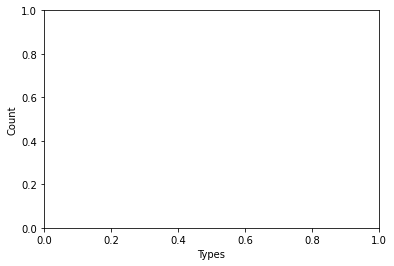

In [9]:
#sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

In [10]:
data['url'] = data['url'].replace('www.', '', regex=True)
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [11]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":1, "malware":1}}
data['Category'] = data['type']
data = data.replace(rem)
data

,url,type,Category
0,br-icloud.com.br,phishing,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1
651188,gamespot.com/xbox360/action/deadspace/,phishing,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1


In [12]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))
data

,url,type,Category,url_len
0,br-icloud.com.br,phishing,1,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45


In [13]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))
data

,url,type,Category,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,1,16,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,1,3,2,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,0,0,0,0,3,0,0,0,0,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,0,0,2,0,2,0,0,0,0,0,0,0,0
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38,0,0,0,0,1,0,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,0,0,0,0,2,0,0,0,0,0,0,0,0


In [14]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [15]:
data['digits']= data['url'].apply(lambda i: digit_count(i))
data

,url,type,Category,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,digits
0,br-icloud.com.br,phishing,1,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,0,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,0,0,0,1
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,1,1,4,2,0,0,0,0,0,0,0,1,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,1,3,2,0,0,0,0,0,0,0,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,0,0,0,0,3,0,0,0,0,0,0,0,0,12
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,0,0,2,0,2,0,0,0,0,0,0,0,0,7
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38,0,0,0,0,1,0,0,0,0,0,0,0,0,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,0,0,0,0,2,0,0,0,0,0,0,0,0,0


In [16]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [17]:
data['letters']= data['url'].apply(lambda i: letter_count(i))
data

,url,type,Category,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,digits,letters
0,br-icloud.com.br,phishing,1,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,0,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,0,0,0,1,25
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,1,1,4,2,0,0,0,0,0,0,0,1,7,60
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,1,3,2,0,0,0,0,0,0,0,1,22,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,0,0,0,0,3,0,0,0,0,0,0,0,0,12,21
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,0,0,2,0,2,0,0,0,0,0,0,0,0,7,29
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38,0,0,0,0,1,0,0,0,0,0,0,0,0,3,30
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,0,0,0,0,2,0,0,0,0,0,0,0,0,0,36


In [18]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

In [19]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))
data

,url,type,Category,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,digits,letters,Shortining_Service
0,br-icloud.com.br,phishing,1,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,0,0,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,0,0,0,1,25,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,1,1,4,2,0,0,0,0,0,0,0,1,7,60,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,1,3,2,0,0,0,0,0,0,0,1,22,199,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,39,0,0,0,0,3,0,0,0,0,0,0,0,0,12,21,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,44,0,0,2,0,2,0,0,0,0,0,0,0,0,7,29,1
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,38,0,0,0,0,1,0,0,0,0,0,0,0,0,3,30,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,45,0,0,0,0,2,0,0,0,0,0,0,0,0,0,36,0


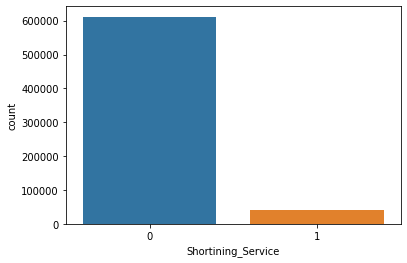

In [20]:
sns.countplot(x='Shortining_Service', data=data);

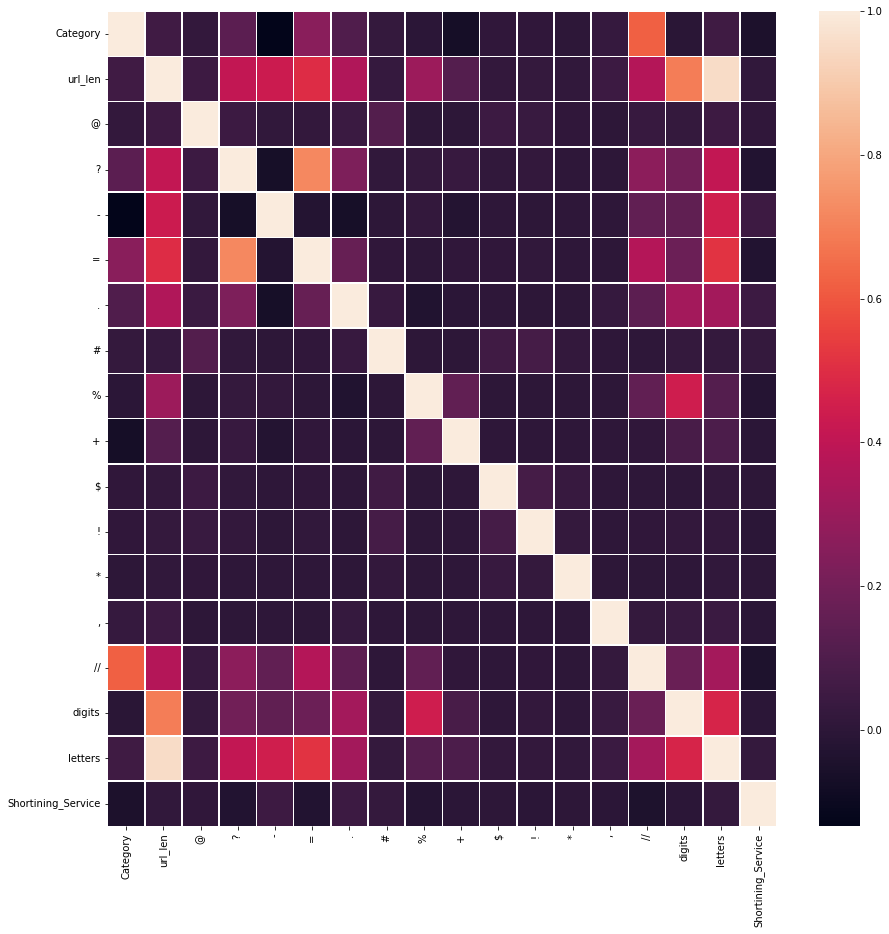

In [21]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), linewidths=.5)

In [22]:
X = data.drop(['url','type','Category'],axis=1)#,'type_code'
y = data['Category']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=2)

In [24]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

In [25]:

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
# X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0,solver='lbfgs', max_iter=1000).fit(X_train, y_train)

In [ ]:
X_train

In [ ]:
X_test

In [35]:
valpred  = clf.predict(X_test)


In [36]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, valpred.round())
print("Accuracy for Logistic Regression: ")
acc
#>>> accuracy_score(y_true, y_pred, normalize=False)

Accuracy for Logistic Regression: 


0.8580217409248051

In [37]:
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, valpred.round())
print("AUPRC for Logistic Regression")
avg

AUPRC for Logistic Regression


0.7108233681590878

In [38]:
y_test

238731    1
309364    0
170638    1
246063    0
466287    0
         ..
549880    1
457491    1
148149    0
574773    0
369760    0
Name: Category, Length: 520953, dtype: int64

In [39]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [40]:
valpred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, valpred.round())
print("Accuracy for Decision Tree: ")
acc

Accuracy for Decision Tree: 


0.9114680211074704

In [41]:
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, valpred.round())
print("AUPRC for Decision Tree:")
avg

AUPRC for Decision Tree:


0.8103291281169562

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred.round())
print("Accuracy for Naive Bayes:")
acc


Accuracy for Naive Bayes:


0.8265697673302582

In [43]:
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, valpred.round())
print("AUPRC for Naive Bayes")
avg

AUPRC for Naive Bayes


0.8103291281169562

In [27]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
y_pred = neigh.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred.round())
print("Accuracy for K nearest Neighbours :")
acc


Accuracy for K nearest Neighbours :


0.906882194746935

In [28]:
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, y_pred.round())
print("AUPRC for K nearest Neighbours")
avg

AUPRC for K nearest Neighbours


0.7982950013618217

In [29]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [30]:
from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf.fit(X_train, y_train)

In [31]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
valpred = rf_random.predict(X_test)
from sklearn.metrics import average_precision_score
avg = average_precision_score(y_test, valpred.round())
print("AUPRC for Random Forest")
avg

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     85565
           1       0.96      0.68      0.80     44674

    accuracy                           0.88    130239
   macro avg       0.91      0.83      0.86    130239
weighted avg       0.89      0.88      0.88    130239

accuracy:   0.882
